In [25]:
%pip install outlier_utils

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from outliers import smirnov_grubbs as grubbs

In [15]:
df_raw = pd.read_csv('countries of the world.csv', sep=',', quotechar='"',decimal=',')
df_raw

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


<Axes: xlabel='Region'>

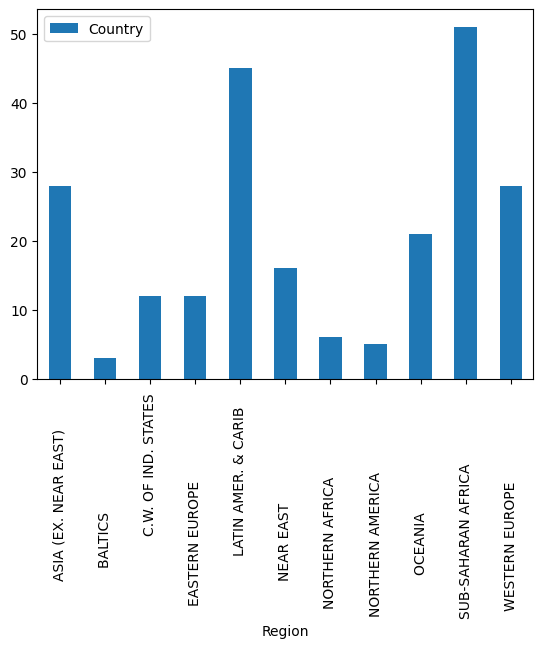

In [16]:
df_grouped = df_raw[['Region', 'Country']].groupby('Region').count().reset_index()
df_grouped.plot(kind='bar', x='Region')

Text(0, 0.5, 'Countries')

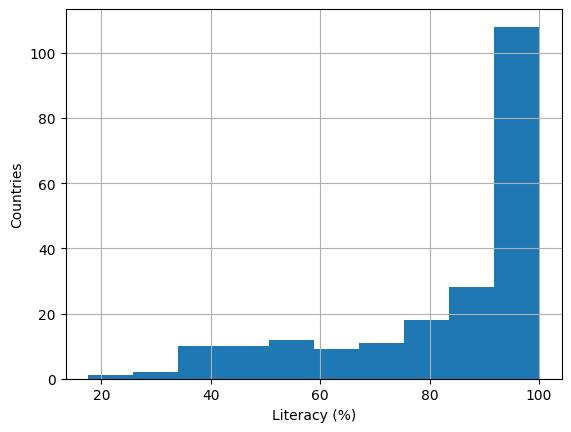

In [ ]:
df_raw['Literacy (%)'].hist(bins=10)
plt.xlabel('Literacy (%)')
plt.ylabel('Countries')

Text(0, 0.5, 'Countries')

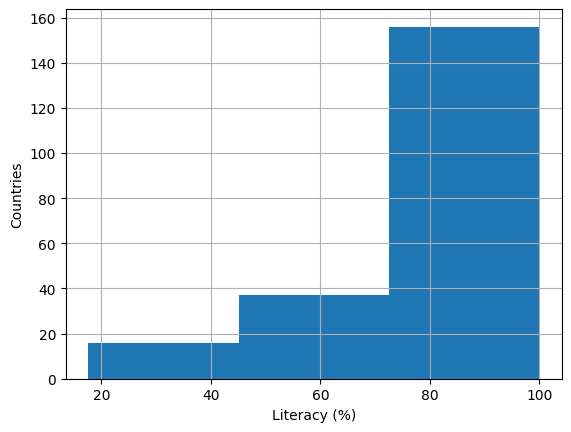

In [ ]:
df_raw['Literacy (%)'].hist(bins=3)
plt.xlabel('Literacy (%)')
plt.ylabel('Countries')

In [19]:
df_raw.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [20]:
df_raw['Literacy (%)'].describe()

count    209.000000
mean      82.838278
std       19.722173
min       17.600000
25%       70.600000
50%       92.500000
75%       98.000000
max      100.000000
Name: Literacy (%), dtype: float64

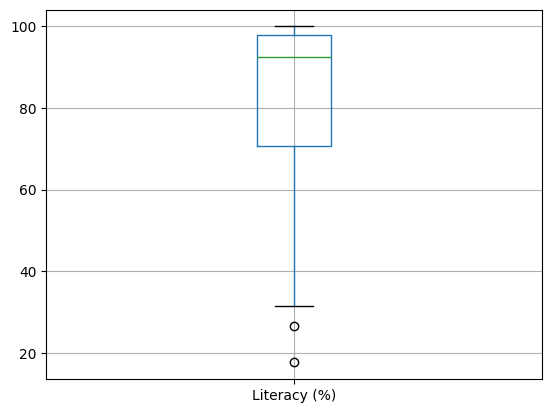

In [21]:
boxplot = df_raw.boxplot(column=['Literacy (%)'])

In [22]:
df_raw[['Country', 'Literacy (%)']].sort_values(['Literacy (%)']).head(5)

,Country,Literacy (%)
151,Niger,17.6
31,Burkina Faso,26.6
183,Sierra Leone,31.4
86,Guinea,35.9
0,Afghanistan,36.0


In [27]:
df_raw['Infant mortality (per 1000 births)'].describe()

count    224.000000
mean      35.506964
std       35.389899
min        2.290000
25%        8.150000
50%       21.000000
75%       55.705000
max      191.190000
Name: Infant mortality (per 1000 births), dtype: float64

In [28]:
grubbs.max_test_indices(df_raw['Infant mortality (per 1000 births)'], alpha=.05)

[5, 0]

In [29]:
df_raw[['Country', 'Infant mortality (per 1000 births)']].head(10)

,Country,Infant mortality (per 1000 births)
0,Afghanistan,163.07
1,Albania,21.52
2,Algeria,31.00
3,American Samoa,9.27
4,Andorra,4.05
5,Angola,191.19
6,Anguilla,21.03
7,Antigua & Barbuda,19.46
8,Argentina,15.18
9,Armenia,23.28


Text(0, 0.5, 'GDP ($ per capita)')

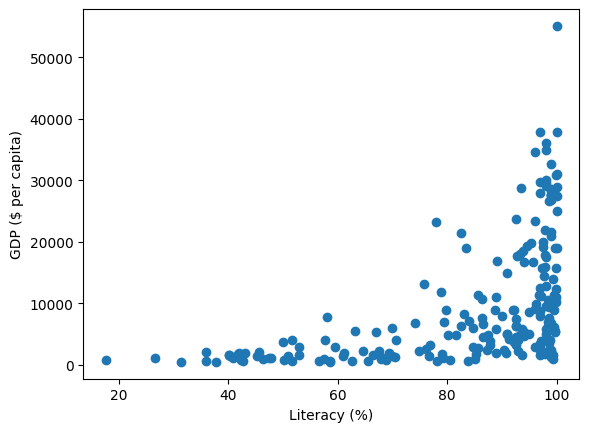

In [30]:
plt.scatter(df_raw['Literacy (%)'], df_raw['GDP ($ per capita)'])
plt.xlabel('Literacy (%)')
plt.ylabel('GDP ($ per capita)')

In [9]:
df_order_raw = pd.read_csv('Orders.csv', encoding='latin_1', sep=';')
df_order=df_order_raw[['OrderID', 'Freight']]
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   OrderID  830 non-null    int64 
 1   Freight  830 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.1+ KB


In [4]:
df_order['Freight'] = df_order['Freight'].str.replace('.', '')
df_order['Freight'] = df_order['Freight'].str.replace(',', '.')
#df_order['Freight'] = df_order['Freight'].astype(float)
df_order['Freight'] = pd.to_numeric(df_order['Freight'])
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   OrderID  830 non-null    int64  
 1   Freight  830 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 13.1 KB


In [5]:
freight_max = max(df_order['Freight'])
freight_min = min(df_order['Freight'])
df_order['freight_norm'] = (df_order['Freight'] - freight_min) / (freight_max - freight_min)
df_order.head()

,OrderID,Freight,freight_norm
0,10248,32.38,0.032115
1,10249,11.61,0.011502
2,10250,65.83,0.065312
3,10251,41.34,0.041008
4,10252,51.30,0.050892


In [6]:
# [-1,1]
range_inf =-1.0
range_sup =1.0
freight_max = max(df_order['Freight'])
freight_min = min(df_order['Freight'])
new_inf =freight_min+range_inf
new_sup =freight_max+range_sup
par1=new_sup-freight_max-new_inf-freight_min
par2=new_inf-freight_min
df_order['freight_norm2'] = (((df_order['Freight'] - freight_min) /
(freight_max - freight_min))*par1)+par2
df_order.head()

,OrderID,Freight,freight_norm,freight_norm2
0,10248,32.38,0.032115,-0.937054
1,10249,11.61,0.011502,-0.977455
2,10250,65.83,0.065312,-0.871988
3,10251,41.34,0.041008,-0.919625
4,10252,51.30,0.050892,-0.900251


In [7]:
df_order.describe()

,OrderID,Freight,freight_norm,freight_norm2
count,830.000000,830.000000,830.000000,830.000000
mean,10662.500000,78.244205,0.077633,-0.847840
std,239.744656,116.779294,0.115896,0.227156
min,10248.000000,0.020000,0.000000,-1.000000
25%,10455.250000,13.380000,0.013259,-0.974012
50%,10662.500000,41.360000,0.041027,-0.919586
75%,10869.750000,91.430000,0.090719,-0.822191
max,11077.000000,1007.640000,1.000000,0.960000


In [12]:
dummies = pd.get_dummies(df_order_raw['ShipCountry'], prefix='Country')
df_order_dum = df_order_raw.join(dummies)
df_order_dum

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,...,Country_Mexico,Country_Norway,Country_Poland,Country_Portugal,Country_Spain,Country_Sweden,Country_Switzerland,Country_UK,Country_USA,Country_Venezuela
0,10248,VINET,5,04/08/1994,01/09/1994,16/08/1994,3,"32,38",Vins et alcools Chevalier,59 rue de l'Abbaye,...,False,False,False,False,False,False,False,False,False,False
1,10249,TOMSP,6,05/08/1994,16/09/1994,10/08/1994,1,"11,61",Toms Spezialitäten,Luisenstr. 48,...,False,False,False,False,False,False,False,False,False,False
2,10250,HANAR,4,08/08/1994,05/09/1994,12/08/1994,2,"65,83",Hanari Carnes,"Rua do Paço, 67",...,False,False,False,False,False,False,False,False,False,False
3,10251,VICTE,3,08/08/1994,05/09/1994,15/08/1994,1,"41,34",Victuailles en stock,"2, rue du Commerce",...,False,False,False,False,False,False,False,False,False,False
4,10252,SUPRD,4,09/08/1994,06/09/1994,11/08/1994,2,"51,30",Suprêmes délices,"Boulevard Tirou, 255",...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,11073,PERIC,2,04/06/1996,02/07/1996,NaN,2,"24,95",Pericles Comidas clásicas,Calle Dr. Jorge Cash 321,...,True,False,False,False,False,False,False,False,False,False
826,11074,SIMOB,7,05/06/1996,03/07/1996,NaN,2,"18,44",Simons bistro,Vinbæltet 34,...,False,False,False,False,False,False,False,False,False,False
827,11075,RICSU,8,05/06/1996,03/07/1996,NaN,2,"6,19",Richter Supermarkt,Starenweg 5,...,False,False,False,False,False,False,True,False,False,False
828,11076,BONAP,4,05/06/1996,03/07/1996,NaN,2,"38,28",Bon app',"12, rue des Bouchers",...,False,False,False,False,False,False,False,False,False,False
